In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../')
import swotpass.satpass as satpass
from swotpass.misc import * 

##### In-situ data x/y/time

In [29]:
### Synthetic x/y/time, for isntance associated with glider measurements

n = 100 # number of samples
lon = np.linspace(150,155, n)
lat = np.linspace(-58,-53, n)
time = pd.date_range('2023-11-15', '2023-11-27', n)

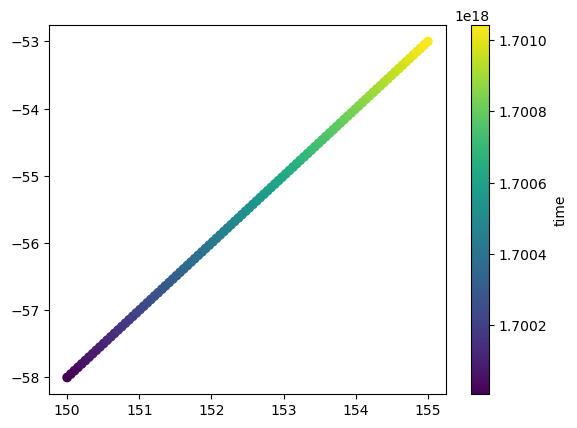

In [30]:
plt.scatter(lon, lat, c = time)
plt.colorbar(label = 'time')

In [31]:
swot_passages = associate_swot_passage_parallel(lon, lat, time) ### Assign the closest in time/space colocated swot passages for each x/y/time entry
swot_passages

  0%|          | 0/100 [00:00<?, ?it/s]

Identify and associate closest SWOT passes [passage, cycle, and time] to each x, y, t


100%|██████████| 100/100 [00:00<00:00, 111.28it/s]


,x,y,t,t_swot,swot_dt,swot_pass,swot_cycle,dis2nadir
0,150.000000,-58.000000,2023-11-15 00:00:00.000000000,2023-11-18 23:54:00,-3.995833,461,6,50.062154
1,150.050505,-57.949495,2023-11-15 02:54:32.727272727,2023-11-18 23:54:00,-3.874621,461,6,50.653153
2,150.101010,-57.898990,2023-11-15 05:49:05.454545454,2023-11-18 23:54:00,-3.753409,461,6,51.592870
3,150.151515,-57.848485,2023-11-15 08:43:38.181818181,2023-11-18 23:54:00,-3.632197,461,6,52.533542
4,150.202020,-57.797980,2023-11-15 11:38:10.909090909,2023-11-15 15:00:00,-0.140152,366,6,64.000764
...,...,...,...,...,...,...,...,...
95,154.797980,-53.202020,2023-11-26 12:21:49.090909091,2023-11-23 13:20:00,2.959596,4,7,28.942642
96,154.848485,-53.151515,2023-11-26 15:16:21.818181818,2023-11-23 13:20:00,3.080808,4,7,34.442859
97,154.898990,-53.101010,2023-11-26 18:10:54.545454545,2023-11-23 13:20:00,3.202020,4,7,39.947604
98,154.949495,-53.050505,2023-11-26 21:05:27.272727272,2023-11-23 13:20:00,3.323232,4,7,45.456875


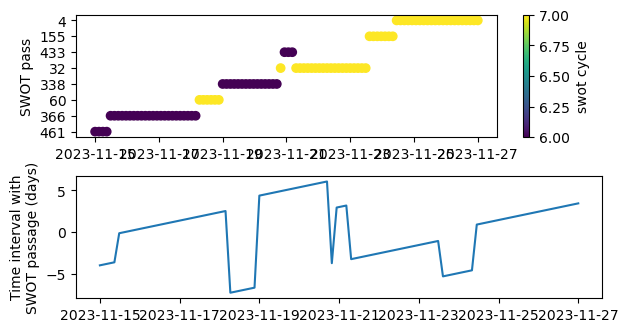

In [32]:
plt.subplot(311)
plt.scatter(time, (swot_passages.swot_pass.astype(str)), c = swot_passages.swot_cycle)
plt.colorbar(label = 'swot cycle')
plt.ylabel('SWOT pass')

plt.subplot(312)
plt.plot(time, swot_passages.swot_dt)
plt.ylabel('Time interval with\nSWOT passage (days)')

plt.tight_layout()

### Mooring

In [42]:
x, y = 152.7260192, -55.7937092
times = pd.date_range('2023-11-15', '2025-04-01', freq = '1D')

swot_passages = associate_swot_passage_parallel(x, y, times, n_passes = 1) ### Assign the closest in time/space colocated swot passages for each x/y/time entry

  0%|          | 0/504 [00:00<?, ?it/s]

Identify and associate closest SWOT passes [passage, cycle, and time] to each x, y, t


100%|██████████| 504/504 [00:01<00:00, 336.40it/s]


Text(0, 0.5, 'Swot pass')

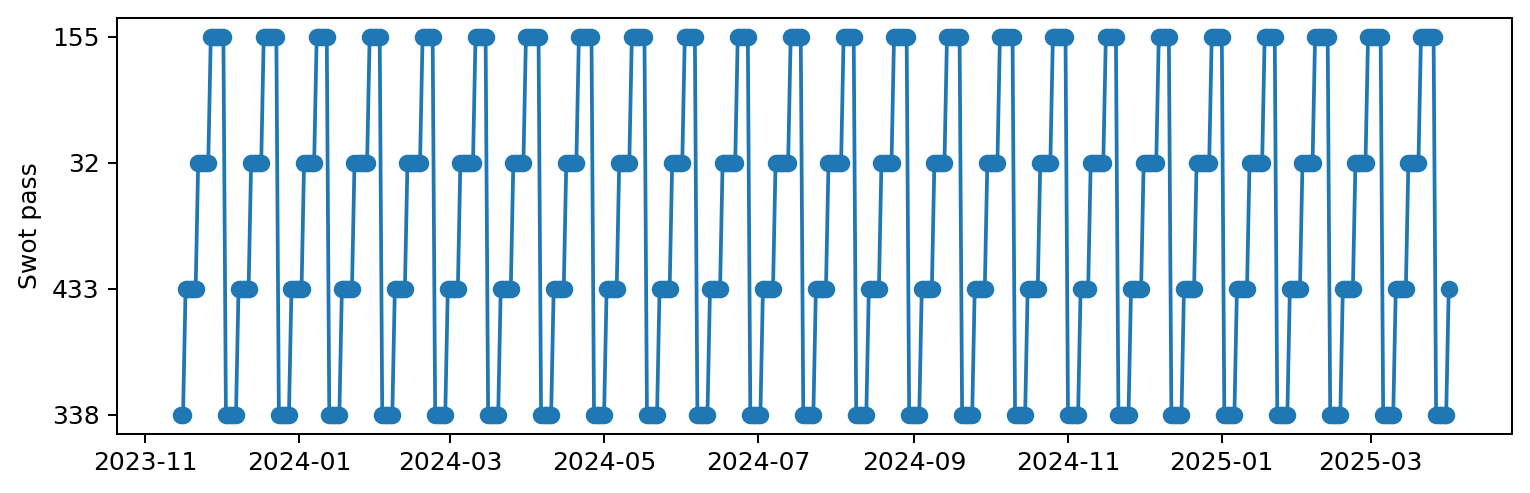

In [43]:
plt.figure(figsize = (10,3), dpi = 180)
plt.plot(swot_passages.t, swot_passages.swot_pass.astype(str), 'o-')
plt.ylabel('Swot pass')

Text(0, 0.5, 'dis2nadir')

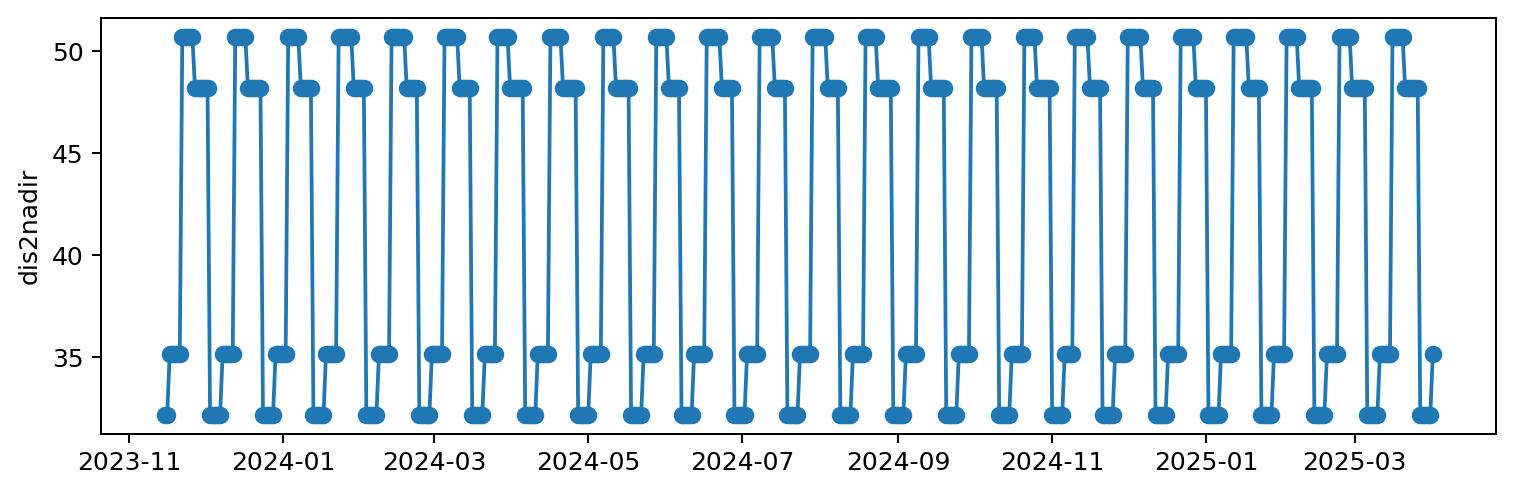

In [44]:
plt.figure(figsize = (10,3), dpi = 180)
plt.plot(swot_passages.t, swot_passages.dis2nadir, 'o-')
plt.ylabel('dis2nadir')

Text(0, 0.5, 'Time-lag with SWOT (days)')

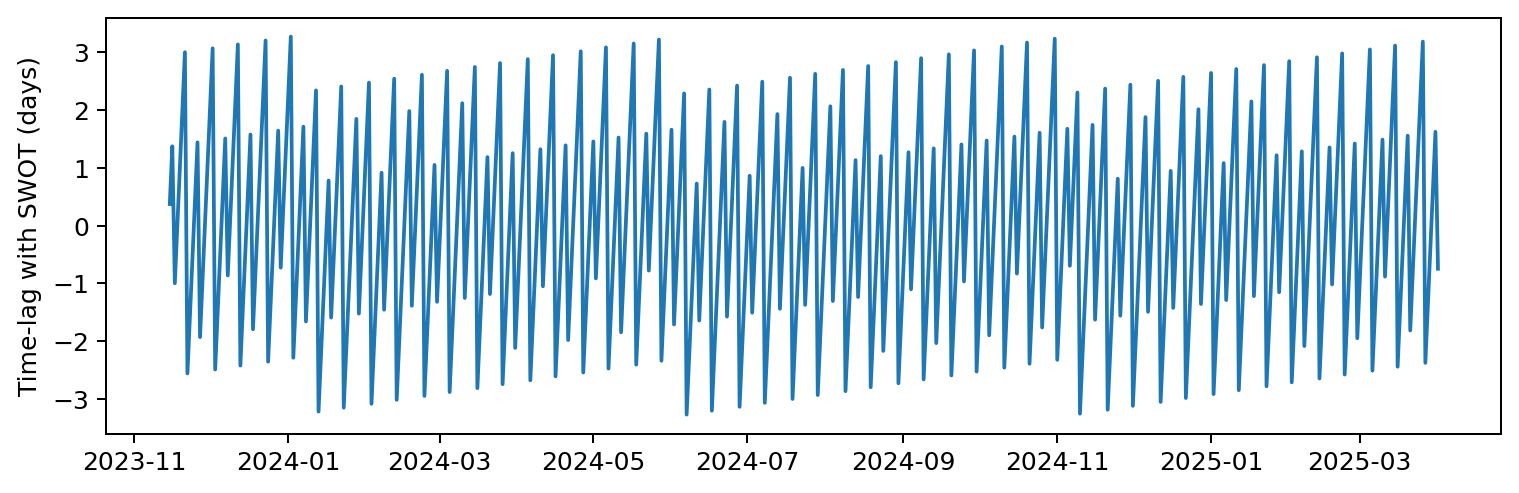

In [45]:
plt.figure(figsize = (10,3), dpi = 180)
plt.plot(swot_passages.t, swot_passages.swot_dt)
plt.ylabel('Time-lag with SWOT (days)')

#### Next STEP : Link with SWOT dataset and interpolation on in-situ x/y/time (To be continued)